In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def process_adoption_data(folder_name):
    datapath = f"../data/{folder_name}/"
    data = pd.read_csv(f"{datapath}/results.csv")

    with open(f"{datapath}/parameters.txt", 'r') as file:
        parameters = file.read()
        print(parameters)

    grouped_data = data.groupby(['Trial', 'agent', 'timestep'])
    
    def all_items_adopted(group):
        return group['adopted'].all()
    
    adopted_all_items = grouped_data.apply(all_items_adopted)
    adopted_all_items = adopted_all_items.reset_index(name='all_adopted')
    
    summary_data = adopted_all_items.groupby(['Trial', 'timestep']).all_adopted.sum().reset_index(name='whole_adopted')
    total_agents = data['agent'].nunique()
    summary_data['whole_adoption_ratio'] = summary_data['whole_adopted'] / total_agents
    
    max_timestep = summary_data['timestep'].max()
    adjusted_data = pd.DataFrame()
    
    for trial in summary_data['Trial'].unique():
        trial_data = summary_data[summary_data['Trial'] == trial]
        last_timestep = trial_data['timestep'].max()
        if last_timestep < max_timestep:
            additional_rows = pd.DataFrame({
                'Trial': trial,
                'timestep': range(last_timestep + 1, max_timestep + 1),
                'whole_adopted': trial_data.iloc[-1]['whole_adopted'],
                'whole_adoption_ratio': trial_data.iloc[-1]['whole_adoption_ratio']
            })
            trial_data = pd.concat([trial_data, additional_rows], ignore_index=True)
        
        adjusted_data = pd.concat([adjusted_data, trial_data], ignore_index=True)
    
    average_adjusted_adoption_data = adjusted_data.groupby('timestep').whole_adoption_ratio.mean().reset_index()
    return average_adjusted_adoption_data

# Using the function for each folder and assigning the result to variables
folders = ["linear_10stories", "linear_20stories", "linear_30stories",
           "binary_10stories", "binary_20stories", "binary_30stories",
           "ternary_10stories", "ternary_20stories", "ternary_30stories"]

for folder in folders:
    variable_name = f"{folder}_data"
    globals()[variable_name] = process_adoption_data(folder)



alpha=0.4
beta=2.0
gamma=0.3
I_scale=0.2
x_0=5.0
x_s=0.9
filestub=reveal_test_one
seed=0
N=1000
R=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

alpha=0.4
beta=2.0
gamma=0.3
I_scale=0.2
x_0=5.0
x_s=0.9
filestub=reveal_test_one
seed=0
N=1000
R=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

alpha=0.4
beta=2.0
gamma=0.3
I_scale=0.2
x_0=5.0
x_s=0.9
filestub=reveal_test_one
seed=0
N=1000
R=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

alpha=0.4
beta=2.0
gamma=0.3
I_scale=0.2
x_0=5.0
x_s=0.9
filestub=reveal_test_one
seed=0
N=1000
R=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

alpha=0.4
beta=2.0
gamma=0.3
I_scale=0.2
x_0=5.0
x_s=0.9
filestub=reveal_test_one
seed=0
N=1000
R=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

alpha=0.4
beta=2.0
gamma=0.3
I_scale=0.2
x_0=5.0
x_s=0.9
filestub=reveal_test_one
seed=0
N=1000
R=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

alpha=0.4
beta=2.0
gamma=0.3
I_scale=0.2

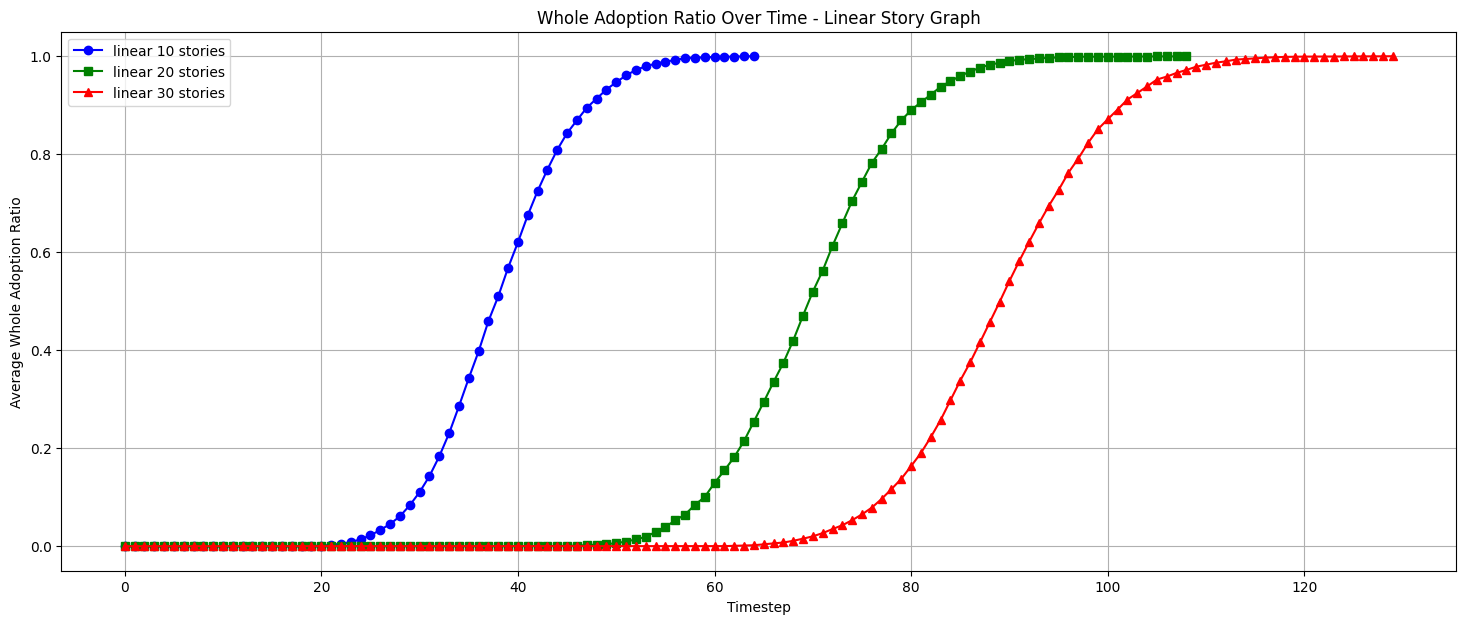

In [5]:
plt.figure(figsize=(18, 7))

plt.plot(linear_10stories_data['timestep'], 
         linear_10stories_data['whole_adoption_ratio'], 
         marker='o', color='blue', label='linear 10 stories')

plt.plot(linear_20stories_data['timestep'], 
         linear_20stories_data['whole_adoption_ratio'], 
         marker='s', color='green', label='linear 20 stories')

plt.plot(ternary_30stories_data['timestep'], 
         ternary_30stories_data['whole_adoption_ratio'], 
         marker='^', color='red', label='linear 30 stories')

plt.title('Whole Adoption Ratio Over Time - Linear Story Graph')
plt.xlabel('Timestep')
plt.ylabel('Average Whole Adoption Ratio')
plt.grid(True)
plt.legend()  # This adds the legend to the plot
plt.show()

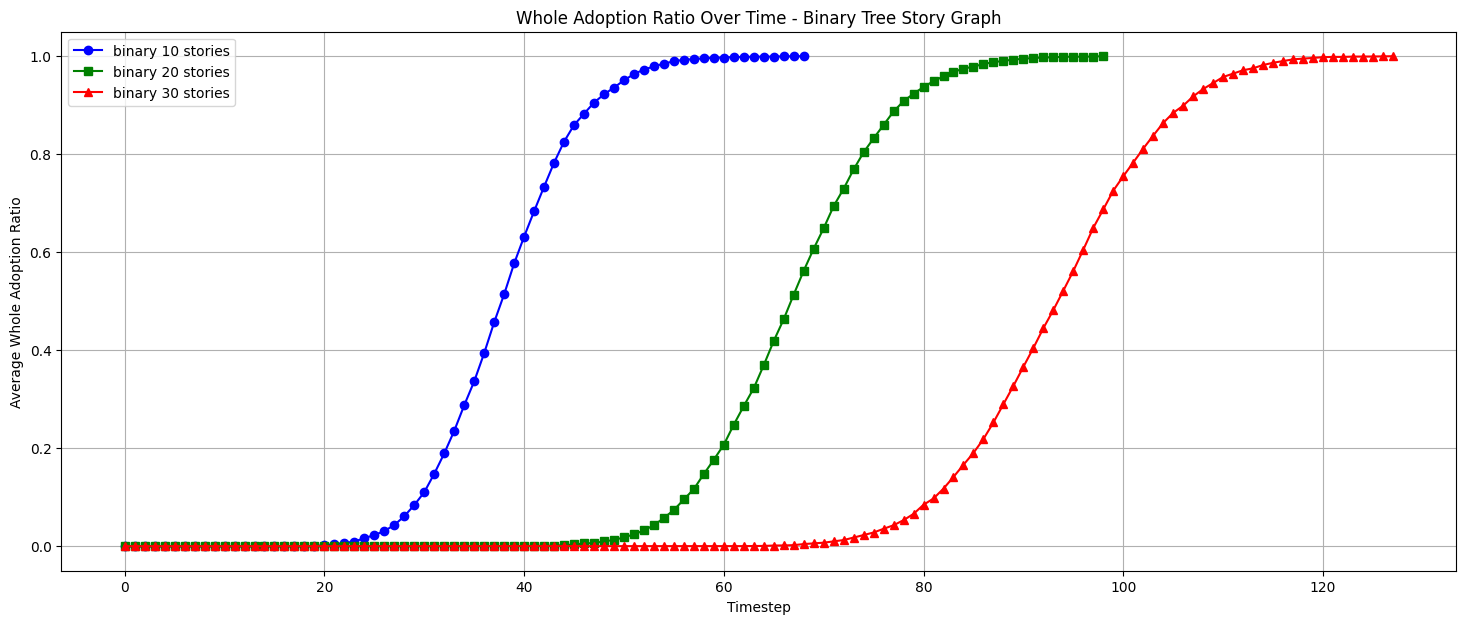

In [6]:
plt.figure(figsize=(18, 7))

plt.plot(binary_10stories_data['timestep'], 
         binary_10stories_data['whole_adoption_ratio'], 
         marker='o', color='blue', label='binary 10 stories')

plt.plot(binary_20stories_data['timestep'], 
         binary_20stories_data['whole_adoption_ratio'], 
         marker='s', color='green', label='binary 20 stories')

plt.plot(binary_30stories_data['timestep'], 
         binary_30stories_data['whole_adoption_ratio'], 
         marker='^', color='red', label='binary 30 stories')

plt.title('Whole Adoption Ratio Over Time - Binary Tree Story Graph')
plt.xlabel('Timestep')
plt.ylabel('Average Whole Adoption Ratio')
plt.grid(True)
plt.legend()  # This adds the legend to the plot
plt.show()


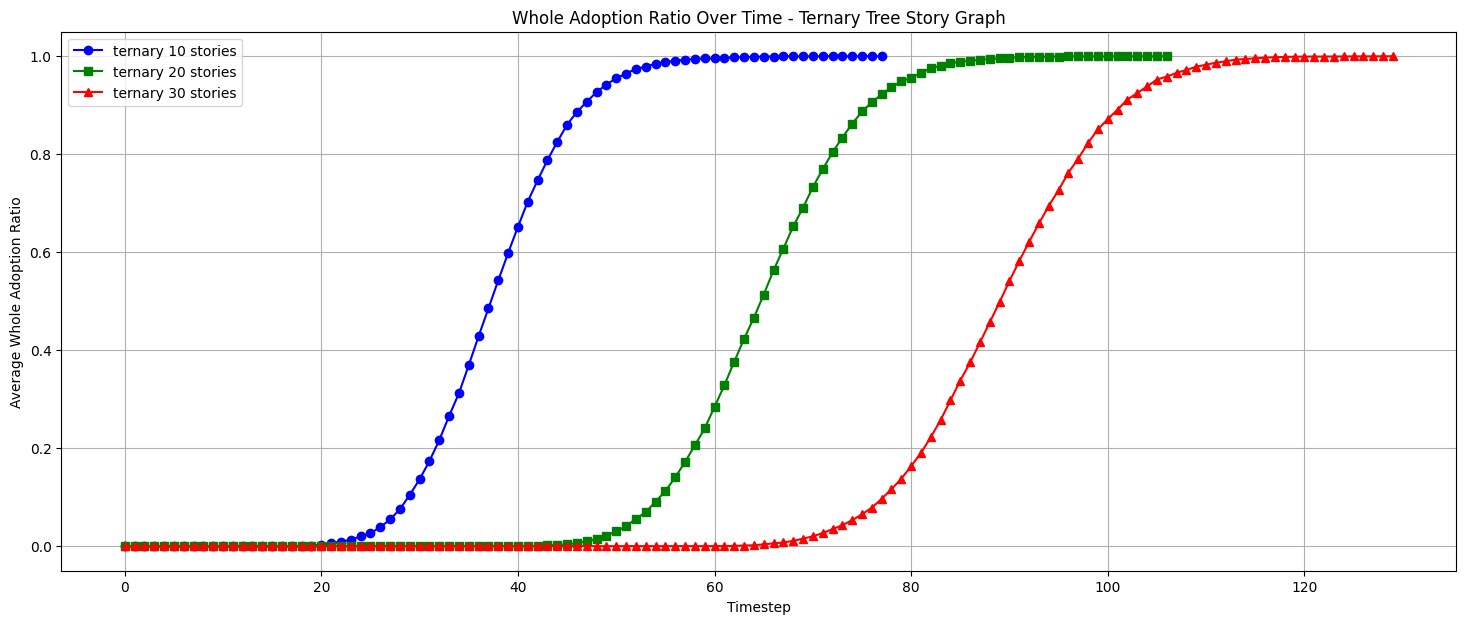

In [7]:
plt.figure(figsize=(18, 7))

plt.plot(ternary_10stories_data['timestep'], 
         ternary_10stories_data['whole_adoption_ratio'], 
         marker='o', color='blue', label='ternary 10 stories')

plt.plot(ternary_20stories_data['timestep'], 
         ternary_20stories_data['whole_adoption_ratio'], 
         marker='s', color='green', label='ternary 20 stories')

plt.plot(ternary_30stories_data['timestep'], 
         ternary_30stories_data['whole_adoption_ratio'], 
         marker='^', color='red', label='ternary 30 stories')

plt.title('Whole Adoption Ratio Over Time - Ternary Tree Story Graph')
plt.xlabel('Timestep')
plt.ylabel('Average Whole Adoption Ratio')
plt.grid(True)
plt.legend()  # This adds the legend to the plot
plt.show()

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

def generate_tree(n, b):
    """
    Generates a tree graph with n nodes and branching factor b.
    
    Parameters:
    - n: Total number of nodes.
    - b: Branching factor.

    Returns:
    - G: A networkx graph.
    """
    if n < 1:
        raise ValueError("The number of nodes, n, should be at least 1.")
    if b < 1:
        raise ValueError("The branching factor, b, should be at least 1.")

    G = nx.Graph()
    node_counter = 1
    queue = [(0, 0)]  # (node, depth)
    
    while queue and node_counter < n:
        current_node, depth = queue.pop(0)
        for i in range(b):
            if node_counter >= n:
                break
            child_node = node_counter
            G.add_edge(current_node, child_node)
            queue.append((child_node, depth + 1))
            node_counter += 1

    return G

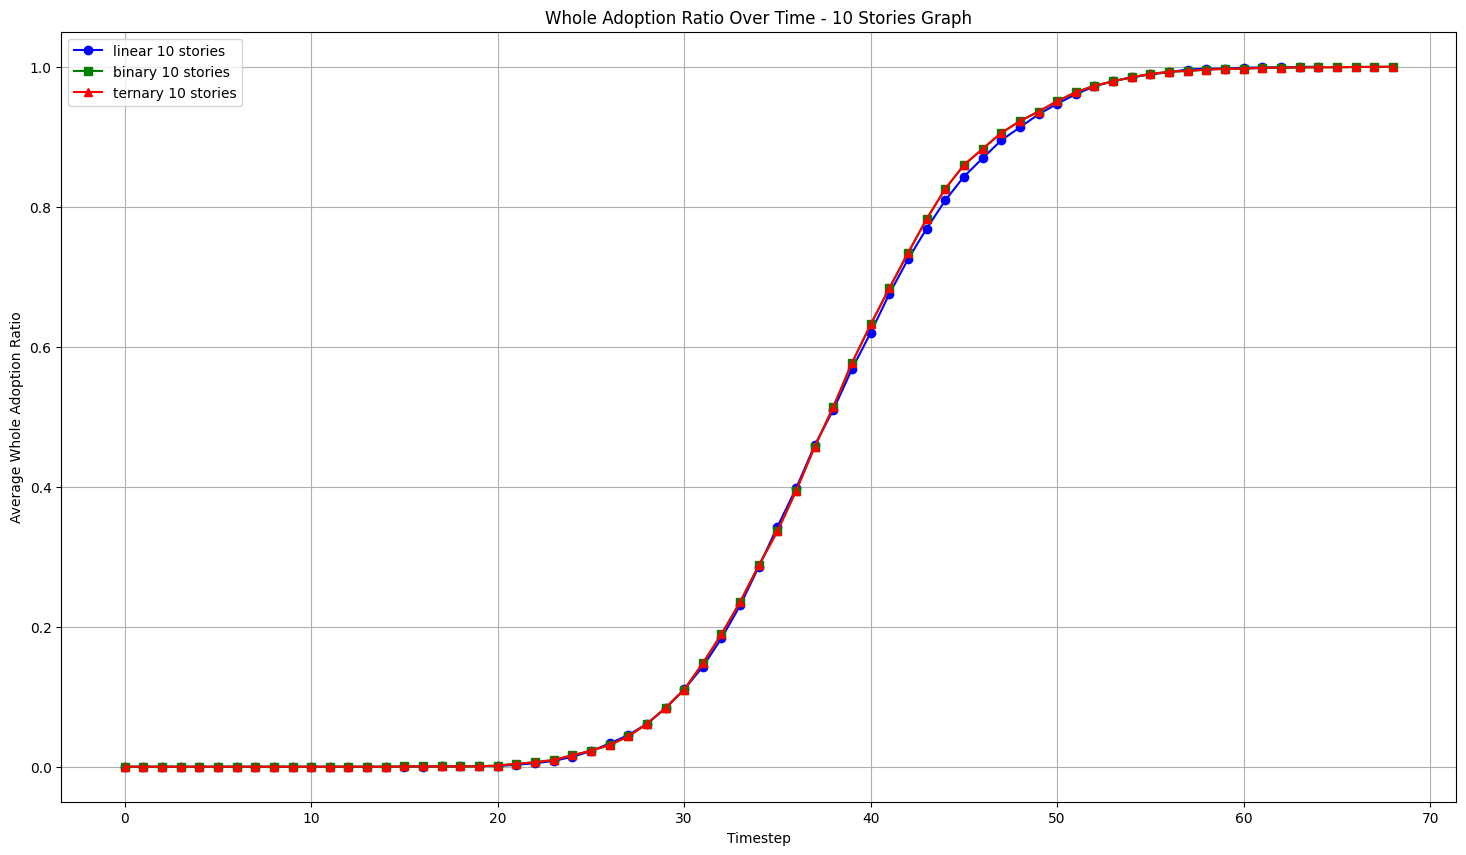

In [9]:
plt.figure(figsize=(18, 10))

plt.plot(linear_10stories_data['timestep'], 
         linear_10stories_data['whole_adoption_ratio'], 
         marker='o', color='blue', label='linear 10 stories')

plt.plot(binary_10stories_data['timestep'], 
         binary_10stories_data['whole_adoption_ratio'], 
         marker='s', color='green', label='binary 10 stories')

plt.plot(binary_10stories_data['timestep'], 
         binary_10stories_data['whole_adoption_ratio'], 
         marker='^', color='red', label='ternary 10 stories')

plt.title('Whole Adoption Ratio Over Time - 10 Stories Graph')
plt.xlabel('Timestep')
plt.ylabel('Average Whole Adoption Ratio')
plt.grid(True)
plt.legend()  # This adds the legend to the plot
plt.show()

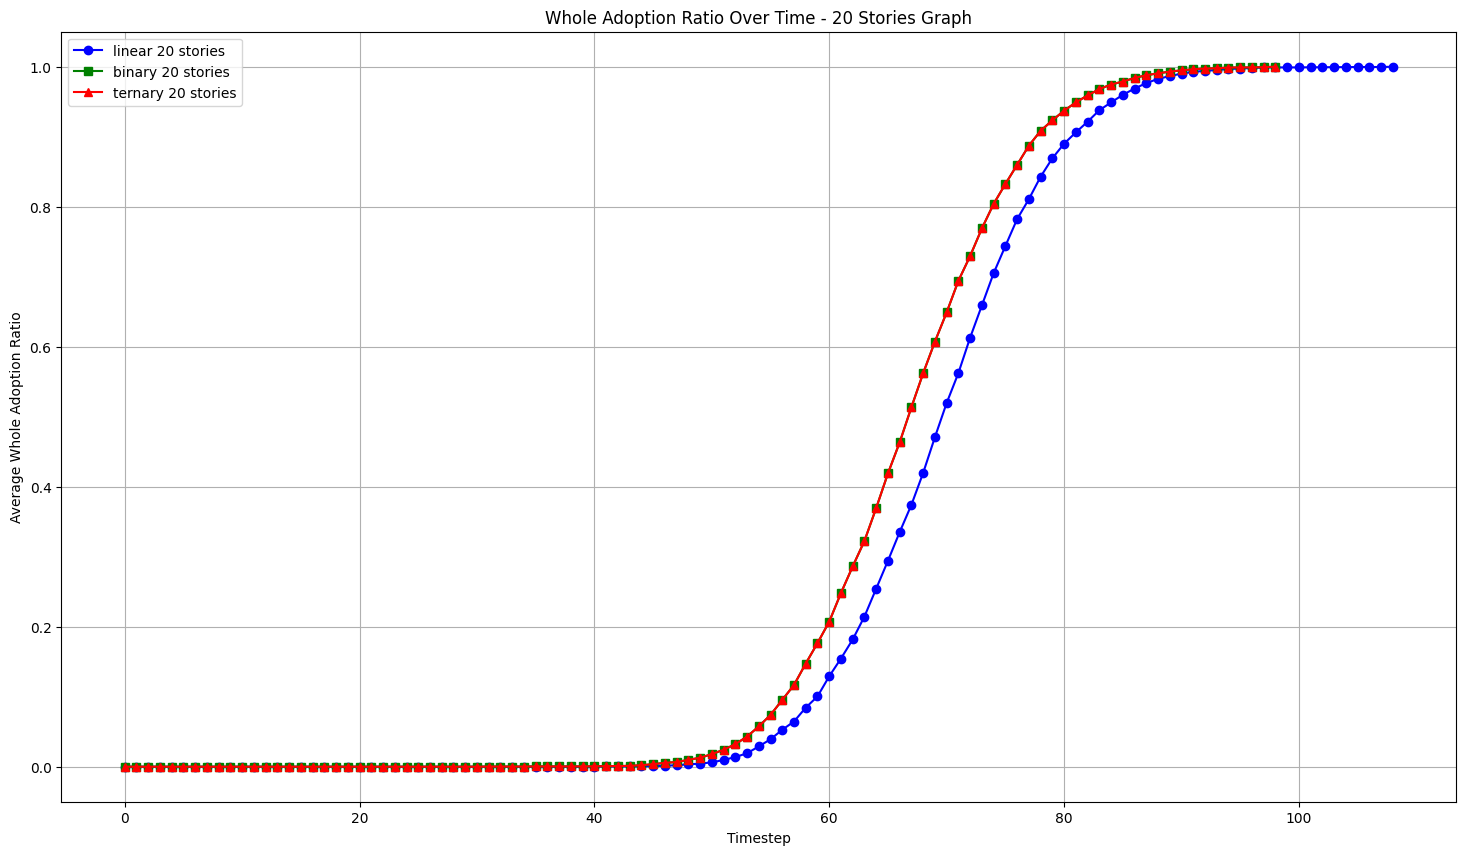

In [10]:
plt.figure(figsize=(18, 10))

plt.plot(linear_20stories_data['timestep'], 
         linear_20stories_data['whole_adoption_ratio'], 
         marker='o', color='blue', label='linear 20 stories')

plt.plot(binary_20stories_data['timestep'], 
         binary_20stories_data['whole_adoption_ratio'], 
         marker='s', color='green', label='binary 20 stories')

plt.plot(binary_20stories_data['timestep'], 
         binary_20stories_data['whole_adoption_ratio'], 
         marker='^', color='red', label='ternary 20 stories')

plt.title('Whole Adoption Ratio Over Time - 20 Stories Graph')
plt.xlabel('Timestep')
plt.ylabel('Average Whole Adoption Ratio')
plt.grid(True)
plt.legend()  # This adds the legend to the plot
plt.show()

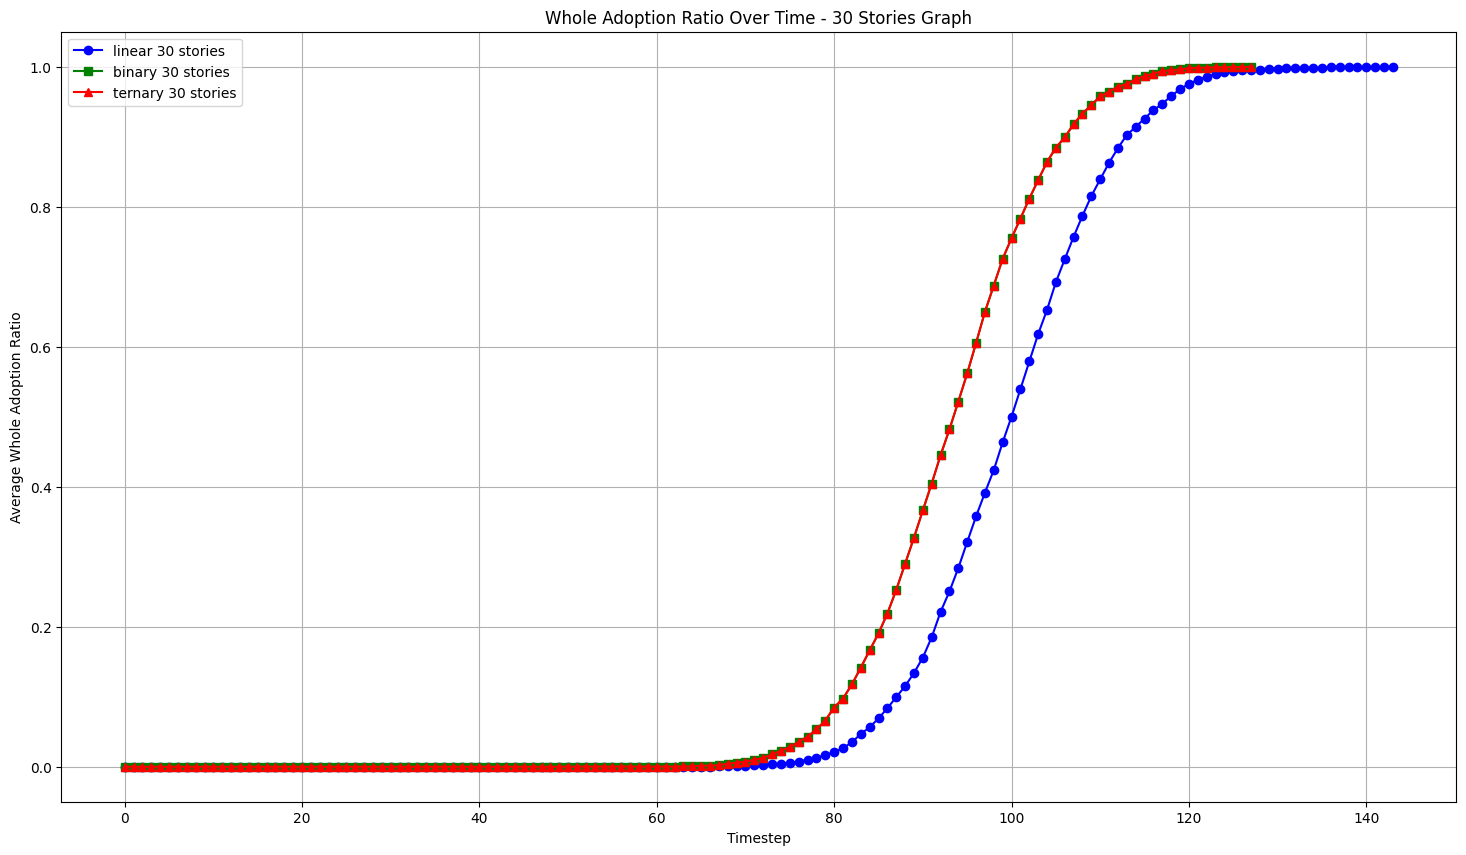

In [11]:
plt.figure(figsize=(18, 10))

plt.plot(linear_30stories_data['timestep'], 
         linear_30stories_data['whole_adoption_ratio'], 
         marker='o', color='blue', label='linear 30 stories')

plt.plot(binary_30stories_data['timestep'], 
         binary_30stories_data['whole_adoption_ratio'], 
         marker='s', color='green', label='binary 30 stories')

plt.plot(binary_30stories_data['timestep'], 
         binary_30stories_data['whole_adoption_ratio'], 
         marker='^', color='red', label='ternary 30 stories')

plt.title('Whole Adoption Ratio Over Time - 30 Stories Graph')
plt.xlabel('Timestep')
plt.ylabel('Average Whole Adoption Ratio')
plt.grid(True)
plt.legend()  # This adds the legend to the plot
plt.show()